# Contagem* de modificações de campos por valor final de algum campo específico
\* Considerando apenas os 39 campos não *custom field*.

**Observação**: Como as features priority e severity não foram baixadas inicialmente com a base, ao baixar tais features para todos os bug reports da base, o bug report de id 1604167 ficou de fora desta análise por ter passado a ser privado.

## Importações

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
pd.set_option('display.float_format', lambda x: '%.2f' % x)


df_bugs_changes = pd.read_json('processed_bugs_counting_changes_final.json')
df_bugs = pd.read_json('bugs_id_severity_priority_final.json')
df_bugs.rename(columns={'id': 'bug_id'}, inplace=True)
df_bugs.rename(columns={'priority': 'final_priority'}, inplace=True)
df_bugs.rename(columns={'severity': 'final_severity'}, inplace=True)

df_bugs = df_bugs_changes.merge(df_bugs, how='inner', on='bug_id')
df_bugs = df_bugs.drop(columns=['bug_id'])
df_bugs['total_changes'] = df_bugs.sum(axis=1, numeric_only=True)

## Agrupamento de contagem de modificações por prioridade final

In [2]:
df_bugs[['final_priority', 'total_changes']].groupby(['final_priority']).describe()

total_changes                                          
                       count  mean   std  min  25%   50%   75%     max
final_priority                                                        
--                 478542.00 11.41 14.28 2.00 5.00  8.00 13.00 1793.00
P1                  42286.00 19.11 20.71 2.00 8.00 13.00 23.00  544.00
P2                  37419.00 17.69 19.61 2.00 8.00 13.00 21.00  595.00
P3                  56434.00 15.40 17.21 2.00 7.00 11.00 18.00 1003.00
P4                  21117.00  8.44  9.06 2.00 6.00  7.00  8.00  860.00
P5                  55018.00  8.73 10.50 2.00 3.00  6.00 10.00  797.00

## Agrupamento de contagem de modificações por severidade final

In [3]:
df_bugs[['final_severity', 'total_changes']].groupby(['final_severity']).describe()

total_changes                                           
                       count  mean   std  min   25%   50%   75%     max
final_severity                                                         
--                  45807.00  8.81  6.98 2.00  5.00  7.00 10.00  190.00
N/A                  4283.00 12.12 11.48 2.00  6.00  9.00 14.00  300.00
S1                    450.00 16.68 14.05 2.00  8.00 11.00 21.00   83.00
S2                   2210.00 19.09 14.67 2.00 10.00 15.00 24.00  129.00
S3                   9120.00 15.32 11.32 2.00  8.00 13.00 19.00  348.00
S4                  12019.00  8.39  7.64 2.00  3.00  6.00 11.00  157.00
blocker              3244.00 17.19 20.03 2.00  7.00 11.00 20.00  530.00
critical            25397.00 15.38 13.97 2.00  6.00 11.00 19.00  254.00
enhancement            45.00 11.53  3.32 8.00  9.00 11.00 13.00   23.00
major                9416.00 15.87 16.64 2.00  6.00 11.00 19.00  244.00
minor                5041.00 11.72  9.31 2.00  6.00  9.00 15.00  137.00
normal             571942.00 12.30 15.81 2.00  5.00  8.00 14.00 1793.00
trivial              1842.00 12.05 21.50 2.00  6.00  9.00 14.00  842.00

final_priority
--    AxesSubplot(0.125,0.125;0.775x0.755)
P1    AxesSubplot(0.125,0.125;0.775x0.755)
P2    AxesSubplot(0.125,0.125;0.775x0.755)
P3    AxesSubplot(0.125,0.125;0.775x0.755)
P4    AxesSubplot(0.125,0.125;0.775x0.755)
P5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_changes, dtype: object

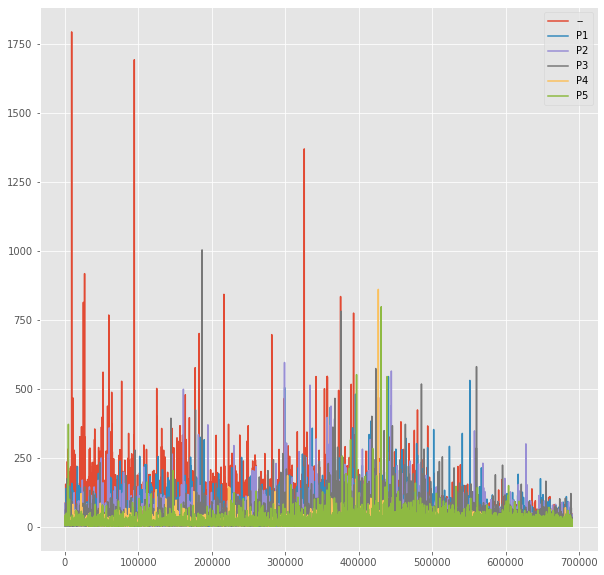

In [4]:
df_bugs.groupby('final_priority')['total_changes'].plot(legend=True, figsize=(10,10))